# Pandas Project

<p style="background-color:#e6e6e6;font-style:italic;padding:15px;">Este repositorio es un proyecto sobre la librería pandas de Python que he realizado como tarea durante el bootcamp de Data Analytics de <a href="https://www.ironhack.com/" title="Ironhack">Ironhack</a>. Se trata del primer proyecto que realizamos.</p>

Para el proyecto de pandas hemos recibido el dataset *Global Shark Attack Incidents* disponible en [kaagle.com](https://www.kaggle.com/teajay/global-shark-attacks/version/1/kernels). Se trata de un archivo csv con datos sobre ataques de tiburones alrededor de todo el mundo.

El objetivo del proyecto es plantear una hipótesis y confirmarla con los datos del dataset. Sin embargo, los datos de la bbdd son muy caóticos, por lo que es necesario filtrar y limpiar los datos para poder confirmarla.

Así que... ¡Vamos a ello!

<br/>
<br/>
<br/>
<br/>


![Baby shark](baby-shark.gif)

## Cargando el dataset

Cargamos el dataset con un encoding adecuado.

Además de añadir la librería pandas, cargamos el archivo `myfunctions` donde hay algunas funciones que utilizaremos más tarde en el proyecto y el archivo `drawplots` que nos servirá para dibujar gráficos.

In [1]:
import pandas as pd
import myfunctions as mf
import drawplots as dp
from IPython.display import display_html # Lo utilizo para representar algunas tablas de manera más visual


df = pd.read_csv("./GSAF5.csv", encoding="latin1").copy()
display(df.head())

print(df.columns)
print(df.shape)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
(5992, 24)


La base de datos contiene 5992 valores y 24 columnas. No obstante, muchos de las columnas contienen información poco útil (como las dos últimas, 'Unnamed: 22', 'Unnamed: 23') y la tabla contiene muchos valores nulos en algunas columnas.

In [2]:
null_cols = df.copy().isnull().sum()
print(null_cols)

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64


## Mi hipótesis

La hipótesis que quiero comprobar es:

<p style="background-color: #e6e6e6;font-size: 25px;padding: 30px 0;font-weight: bold;text-align:center">Los tiburones pequeños son más peligrosos<p>

La base de datos no tiene una columna de tamaño. Sin embargo, la columna `Species` contiene en muchas filas información sobre el tamaño del tiburón que ha mordido.

La columna `Species` contiene muchos valores nulos y los no nulos a lo mejor no contienen datos sobre el tamaño. Por tanto, los resultados me darán una muestra que a lo mejor no es representativa de la población. Sin embargo, se trata de un ejercicio de clase y he elegido dicha hipótesis porque:

- Me parece un ejercicio interesante de regex
- Contiene datos numéricos, a los que le puedo aplicar más fácilmente las funciones estadísticas que hemos visto en clase.


## Limpieza del dataset

Crearé una nueva columna `Sizes` donde guardaré los tamaños. Compararé el número de ataques y su mortalidad con los tamaños. Por lo tanto, la limpieza es sencilla: Para verificar mi hipótesis únicamente necesito las columnas tamaño y `Fatal (Y/N)`.

Para empezar, consultado el método `.columns` se observa que las columnas `Species` y `Sex` tienen un espacio después de la palabra. Normalizamos las columnas:

In [3]:
print(df.columns)
clean_cols = list(map(lambda x: x.strip(), df.columns.copy()))
df.columns = pd.DataFrame(columns=clean_cols).columns
print(df.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


Por otra parte, en la columna `Type` hay columnas con el valor *Invalid*. Consultando varios PDFs adjuntos en la columna `href`, se observa que dichos ataques son avisos falsos, mordeduras post-mortem o casos muy muy dudosos.

Por tanto, decido borrar todos dichos datos.

In [4]:
df=df[df["Type"] != "Invalid"].copy()

In [5]:
null_cols = df.copy().isnull().sum()
print(null_cols)
print(df.shape)

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     38
Area                       358
Location                   445
Activity                   407
Name                       147
Sex                        494
Age                       2383
Injury                      20
Fatal (Y/N)                  5
Time                      2837
Species                   2655
Investigator or Source      12
pdf                          0
href formula                 1
href                         2
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5472
Unnamed: 23               5472
dtype: int64
(5473, 24)


### Limpiando duplicados

Antes de limpiar las celdas, comprobaremos si nuestro df tiene duplicados. Como se observa en la siguiente operación, **no existen filas duplicadas**.

In [6]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Duplicados eliminados {}: '.format(str(before - after)))

Duplicados eliminados 0: 


### Limpieza de la columna `Species`

Por otra parte, observo que hay algunos datos en la columna `Species` que recogen, en una sola fila, tiburones de varios tamaños. Como por ejemplo, las siguientes:

> A partir de ahora, para mantener la variables `df` con los valores iniciales, todas las operaciones las haremos sobre una copia, `wdf`(*working dataframe*). Las únicas acciones sobre la df original han sido el *rename* de las columnas y la eliminación de los datos catalogados como *Inválidos*

In [7]:
wdf = df.copy()

aux = wdf[(wdf["Species"].str.contains("[\d\.]+\sm\s&\s[\d\.]+\sm|[\d\.]+\s'\s&\s[\d\.]+\s'")==True)].copy()
print(aux.shape)
aux["Species"].value_counts()

(5, 24)


Said to involve 2 sharks: 5.2 m & 6 m [17' & 20']             1
Two sharks seen in vicinity: 2.4 m & 4.25 m  [8' & 14'] TL    1
2 scalloped hammerhead sharks, 1.5 m & 1.8 m [5' & 6']        1
4.5 m & 5 m white shark                                       1
2 sharks, 4.5 m & 3 m                                         1
Name: Species, dtype: int64

Para poder contabilizar dichos ataques como 2, en vez de como uno solo, decido hacer los siguiente:

* Añado dos filas al final de mi dataframe que son copias de la fila con dos ataques.
* Les cambio el valor de la fila `Species` por los dos tamaños diferentes.
* Borro de mi dataset la fila con el valor duplicado.

Esto lo he hecho con una función al que le enviamos el dataframe a modificar, las columnas afectadas y una expresión regular que saca por grupos los valores que queremos duplicar.

In [8]:
wdf["Sizes"] = wdf["Species"].copy()
print(wdf.shape)

# FUNCIÓN CON REGEX PARA PIES

wdf = mf.quitarDuplicados(wdf.copy(), "Sizes", "([\d\.]+')\s&\s([\d\.]+')").copy()
print(wdf.shape)

# FUNCIÓN CON REGEX PARA METROS

wdf = mf.quitarDuplicados(wdf.copy(), "Sizes", "([\d\.]+\sm)\s&\s([\d\.]+\sm)").copy()
print(wdf.shape)
display(wdf.iloc[-5:])

(5473, 25)


/home/alfonso/ironhack/datamad0619/module-1/pandas-project/your-code/myfunctions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  aux_fdf[col][aux_fdf.index.max()] = i


(5476, 25)
(5478, 25)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Sizes
5474,1959.01.17.b,17-Jan-59,1959,Unprovoked,AUSTRALIA,Tasmania,Safety Cove,In deep water about 100 yards from his ship,"Brian Derry, a Naval Rating",M,...,"Odessa American, 1/19/1959; G.P. Whitley, ref ...",1959.01.17.b-Derry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1959.01.17.b,1959.01.17.b,2105,NaN,NaN,20'
5475,2004.12.16,16-Dec-04,2004,Unprovoked,AUSTRALIA,South Australia,"West Beach, Adelaide",Scurfing (surfboard being towed behind a boat),Nick Peterson,M,...,"P. Kemp & T. Peake, GSAF",2004.12.16-Peterson-draft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.12.16,2004.12.16,4598,NaN,NaN,4.5 m
5476,2004.12.16,16-Dec-04,2004,Unprovoked,AUSTRALIA,South Australia,"West Beach, Adelaide",Scurfing (surfboard being towed behind a boat),Nick Peterson,M,...,"P. Kemp & T. Peake, GSAF",2004.12.16-Peterson-draft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.12.16,2004.12.16,4598,NaN,NaN,5 m
5477,2004.07.10,10-Jul-04,2004,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders Beach, Margaret River",Surfing,Bradley Adrian Smith,M,...,"T. Peake, GSAF",2004.07.10-BradSmith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.07.10,2004.07.10,4560,NaN,NaN,4.5 m
5478,2004.07.10,10-Jul-04,2004,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders Beach, Margaret River",Surfing,Bradley Adrian Smith,M,...,"T. Peake, GSAF",2004.07.10-BradSmith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.07.10,2004.07.10,4560,NaN,NaN,3 m


Como se observa, antes de aplicar la función, el dataframe tenía 5473 filas y después 5478. Es decir hemos agregado (*10 filas nuevas - 5 filas eliminadas*) **5 filas nuevas**.

Las últimas filas mostradas están duplicadas a excepción de los tamaños, que son los que estaban recogidos anteriormente, es decir:

<pre>
Two sharks seen in vicinity: 2.4 m & 4.25 m  [8' & 14'] TL
Said to involve 2 sharks: 5.2 m & 6 m [17' & 20']
<b style="color:red;">4.5 m</b> & <b style="color:red;">5 m</b> white shark
2 scalloped hammerhead sharks, 1.5 m & 1.8 m [5' & 6']
2 sharks, <b style="color:red;">4.5 m</b> & <b style="color:red;">3 m</b>
</pre>

A continuación, limpiamos la columna `Species` para quedarnos solo con los tamaños. Para ello, creo una nueva columna que llamaremos `Sizes` donde guardaremos los datos limpios.

La columna la limpieza a través de una función y mediante *regex*. Además, utilizamos la librería `statistics` para utilizar la función `mean`.

In [9]:
wdf['Sizes'].fillna("UNKNOWN",inplace=True)
wdf['Sizes'] = wdf["Sizes"].apply(mf.create_sizes)
wdf['Sizes'].value_counts()

UNKNOWN    3592
6           236
4           223
7           180
10          171
5           168
8           164
12          111
3            90
13           84
16           75
9            66
15           66
2            48
14           48
11           45
20           42
18           31
19           12
17            7
22            6
23            4
21            2
25            2
1             2
3819          1
59            1
Name: Sizes, dtype: int64

### Limpieza de la columna `Fatal (Y/N)`

Por último, limpio la columna `Fatal (Y/N)`. Esto es bastante más sencillo, ya que únicamente tiene algunos datos con espacios delante o hay diferencias entre mayúsculas y minúsculas.

Aprovechamos y guardamos las variables como `boolean`.

In [10]:
print(wdf["Fatal (Y/N)"].value_counts())
wdf['Fatal (Y/N)'].fillna("UNKNOWN",inplace=True)
wdf["Fatal (Y/N)"] = wdf["Fatal (Y/N)"].apply(lambda x: x.upper().strip())
wdf["Fatal (Y/N)"] = wdf["Fatal (Y/N)"].apply(lambda x: True if x == "Y" else ("UNKNOWN" if x == "UNKNOWN"\
                                                                               else False))
print(wdf["Fatal (Y/N)"].value_counts())

N          4082
Y          1312
UNKNOWN      70
 N            7
n             1
N             1
Name: Fatal (Y/N), dtype: int64
False      4091
True       1312
UNKNOWN      75
Name: Fatal (Y/N), dtype: int64


### Valores incorrectos

Parece que hay un par de valores raros en la columna `Sizes`. En concreto 59 y 3819 pulgadas. Decido mostrarlo y buscar el error. Como se ve a continuación, se debe a que el *regex* ha considerado los mm como m. Además, uno de ellos es inválido, ya que habla de un *diente de tiburón de 18 mm* y no del tamaños del tiburón.

Hay otro valor también en la tabla que contiene la cadena *mm*.

Finalmente lo corrijo.

In [11]:
aux = wdf[(wdf["Sizes"]==59)].copy()
display(aux[["Species", "Sizes"]])
aux = wdf[(wdf["Sizes"]==3819)].copy()
display(aux[["Species", "Sizes"]])
aux = wdf[((wdf["Species"].str.contains("mm "))==True) | ((wdf["Species"].str.contains(" mm"))==True)].copy()
display(aux[["Species", "Sizes"]])

,Species,Sizes
3420,"White shark, 18 mm tooth fragment recovered f...",59


,Species,Sizes
3430,"Lemon shark, 1164 mm, immature male, identifie...",3819


,Species,Sizes
3420,"White shark, 18 mm tooth fragment recovered f...",59
3430,"Lemon shark, 1164 mm, immature male, identifie...",3819
5010,5 mm 3500 kg female shark,16


In [12]:
wdf["Sizes"][(wdf["Species"].str.contains("1164 mm"))==True] = round(1164/304.8)
wdf["Sizes"][(wdf["Species"].str.contains("5 mm 3500 kg"))==True] = round(5*3.281)
wdf["Sizes"][(wdf["Species"].str.contains("18 mm tooth"))==True] = "UNKNOWN"

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
aux = wdf[((wdf["Species"].str.contains("mm "))==True) | ((wdf["Species"].str.contains(" mm"))==True)]
display(aux[["Species", "Sizes"]])

,Species,Sizes
3420,"White shark, 18 mm tooth fragment recovered f...",UNKNOWN
3430,"Lemon shark, 1164 mm, immature male, identifie...",4
5010,5 mm 3500 kg female shark,16


### Limpieza de tipos

Nuestras columnas tienen los valores "UNKNOWN", así que, aunque guardemos enteros y booleanos, deben ser strings.

In [14]:
print(wdf["Sizes"].dtype, wdf["Fatal (Y/N)"].dtype )

object object


### Valores extremos y *outliers*

Calculamos los valores extremos de nuestra columna numérica `Sizes`. Trabajamos con una df auxiliar donde eliminamos los valores "UNKNOWN" y transformamos correctamente los tipos.

In [15]:
aux_fatal = wdf[["Sizes", "Fatal (Y/N)"]][(wdf["Sizes"] != "UNKNOWN") & (wdf["Fatal (Y/N)"] != "UNKNOWN")\
                                          & (wdf["Sizes"].isnull() != True)].copy()

aux_fatal["Sizes"]=aux_fatal["Sizes"].apply(int)

stats = aux_fatal.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
display(stats)

outliers = pd.DataFrame(columns=aux_fatal.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = aux_fatal[(aux_fatal[col] < lower) | 
                   (aux_fatal[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    
display(outliers)

,count,mean,std,min,25%,50%,75%,max,IQR
Sizes,1874.0,8.59445,4.498192,1.0,5.0,7.0,12.0,25.0,7.0


/home/alfonso/.local/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Fatal (Y/N),Outlier,Sizes
551,False,Sizes,23
1722,False,Sizes,23
2551,True,Sizes,23
3084,False,Sizes,25
5276,True,Sizes,25


El resultado es que los tiburones de entre 23 y 25 pies (7-7.5 metros) son *outliers*.

No soy experto en tiburones, pero no me extrañaría que existieran algunos ejemplares así. Decido dejarlos tras comprobar que no son valores erróneos.

In [16]:
aux = wdf[(wdf["Sizes"] != "UNKNOWN") & (wdf["Fatal (Y/N)"] != "UNKNOWN") & (wdf["Sizes"].isnull() != True)].copy()
display(aux[["Sizes", "Species"]][aux["Sizes"] >= 23])

,Sizes,Species
551,23,"White shark, 7m"
1722,23,Said to involve a 7 m [23'] white shark
2551,23,7 m [23'] white shark
3084,25,"Alleged to involve a White shark, 7.6 m [25']"
5276,25,Said to be a 7.6 m [25'] shark


In [17]:
aux_fatal.reset_index(inplace=True)

## Comprobación de hipótesis

Representamos el número de ataques de tiburones por tamaños, observando claramente que el mayor número de ataques es ocasionado por tiburones pequeños.

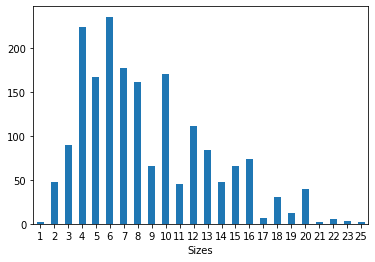

In [18]:
aux_fatal.groupby("Sizes").count()["index"].plot.bar(rot=0)

A continuación representamos la mortalidad de los ataques en función de su tamaño.

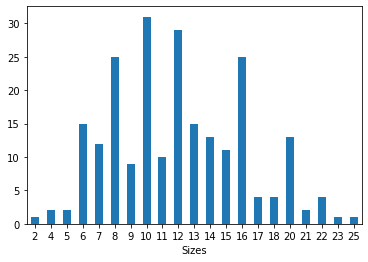

In [19]:
aux_yes = aux_fatal[aux_fatal["Fatal (Y/N)"]==True].fillna(0).copy()

#aux_yes.rename(columns={"Fatal (Y/N)": "Fatal"}, inplace = True)
aux_yes.groupby("Sizes").count()["index"].plot.bar(rot=0)

Esta gráfica parece tener una similitud con una gráfica simétrica, lo que puede indicar que son más mortales los tiburones de tamaño medio. Sin embargo, el gráfico no parece muy representativo, por lo que decido calcular y representar **el porcentaje de mortalidad para cada tamaño de tiburón**.

In [20]:
aux_no = aux_fatal[aux_fatal["Fatal (Y/N)"]==False].copy()

display_html(aux_yes.groupby("Sizes").count()\
             .style.set_table_attributes("style='display:inline'").set_caption('Fatal')._repr_html_()+\

             aux_no.groupby("Sizes").count()\
             .style.set_table_attributes("style='display:inline;margin-left:60px'").set_caption('Not Fatal')\
             ._repr_html_(), raw=True)

,index,Fatal (Y/N)
Sizes,,
2,1,1
4,2,2
5,2,2
6,15,15
7,12,12
8,25,25
9,9,9
10,31,31
11,10,10


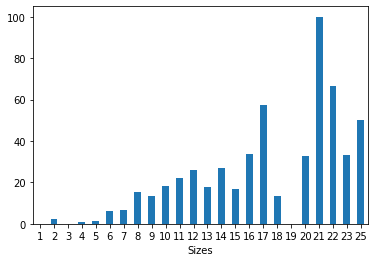

In [21]:
p_fatality = (aux_yes.groupby("Sizes").count().div(\
aux_yes.groupby("Sizes").count().add(aux_no.groupby("Sizes").count(), fill_value=0), fill_value=0)*100)
p_fatality["Fatal (Y/N)"].plot.bar(rot=0)

In [22]:
display(p_fatality.head())

,index,Fatal (Y/N)
Sizes,,
1,0.000000,0.000000
2,2.083333,2.083333
3,0.000000,0.000000
4,0.892857,0.892857
5,1.197605,1.197605


## Conclusiones

Para hablar de las conclusiones, a parte de los gráficos que acabamos de ver, es interesante recordar los stats de la columna `Size`. También considero interesante representar algunos cuartiles más.

In [23]:
display(stats)

display(aux_fatal["Sizes"].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]))

,count,mean,std,min,25%,50%,75%,max,IQR
Sizes,1874.0,8.59445,4.498192,1.0,5.0,7.0,12.0,25.0,7.0


0.1     4.0
0.2     5.0
0.3     6.0
0.4     6.0
0.5     7.0
0.6     9.0
0.7    10.0
0.8    12.0
0.9    15.0
Name: Sizes, dtype: float64

Como se observa, el 50% de los ataques se producen por tiburones de 7' (2 m) o menos y el 75% por individuos de 12' (3.6 m) o menos. El tiburón de mayor tamaño cuyo ataque ha sido registrado ha sido de 25' (7.6 m).

No hay datos registrados de "tiburones gigantes", como el tiburón ballena (12 m) o el tiburón peregrino (8 m), que por otra parte, son inofensivos para los humanos.

Tal vez, el más temido de ellos sea el tiburón blanco que alcanza de 5 a 8 m. Pero como se observa, los ataques de tiburones de estos tamaños son poco frecuentes. **Tan solo el 10% de los ataques es producido por tiburones de más de 15' (4,5 m)**. Por tanto, el miedo al tiburón blanco (tal vez debido al cine) es totalmente infundado.

En cambio, como hemos mencionado, el 75% de los ataques es realizado por tiburones de menos de 3.6 m, lo que recogerá a especies menos conocidas como el tiburón tigre, el tiburón azul o el tiburón toro.

No obstante, es importante destacar la última gráfica. Aunque los tiburones "pequeños" son más peligrosos, debido a que sus ataques son más frecuentes, la mortalidad de sus ataques es mucho menor que la de los tiburones grandes. Es posible afirmar que que **la mortalidad de los ataques de tiburón es mayor según aumenta su tamaño**.

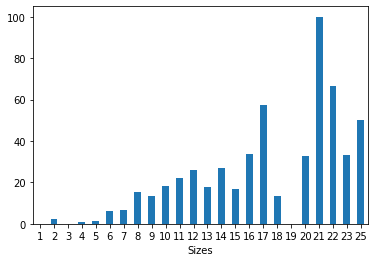

In [24]:
p_fatality["Fatal (Y/N)"].plot.bar(rot=0)

Es curiosa la gráfica en las columnas 19 (12 ataques y ninguno mortal) y en la columna 21. Aunque, en esta última, el pico se debe a que solo existen 2 ataques registrados de tiburones de 21'.

Por último, destacar una cosa: De los 1312 ataques mortales, únicamente se tienen datos de tamaño de 229 (el 17,5%). Por tanto, **serían necesarios más datos como para considerar estas conclusiones como definitivas**.

In [25]:
display(wdf["Fatal (Y/N)"].value_counts())
display(aux_fatal["Fatal (Y/N)"].value_counts())

False      4091
True       1312
UNKNOWN      75
Name: Fatal (Y/N), dtype: int64

False    1645
True      229
Name: Fatal (Y/N), dtype: int64

# Bonus

## Limpiamos otras columnas

Otras columnas que veo interesante para comparar con los tamaños son la columna `Injuries`, para saber las heridas que causan los tiburones según su talla; la columna `Species`, para saber si hay alguna relación entre la especie, el tamaño y los ataques; e incluso la columna `Type`, para ver si los ataques de tiburones grande son provocados por el hombre.

### Limpieza columna `Species`

Para la limpieza de `Species` se han añadido las especies que la fuente de los datos recoge en su web y se han añadido otros que aparecen en dicha columna. Además, se ha ido consultando información en internet para agruparlos (por ejemplo, el tiburón *bull* y el *zambezi*, son el mismo).

In [26]:
wdf['Species'].fillna("UNKNOWN",inplace=True)
wdf["Species"] = wdf["Species"].apply(str) # Cambiamos su tipo a string, ya que es una columna de tipo int
wdf["Species"] = wdf["Species"].apply(mf.cleanspecies).copy()
wdf["Species"].value_counts()

UNKNOWN                3591
White                   597
Tiger                   244
Zambezi                 197
Blacktip                 92
Nurse                    91
Bronze whaler            69
Small                    62
Shortfin mako            55
Blue                     53
Great hammerhead         48
Wobbegong                45
Raggedtooth              43
Lemon                    31
Oceanic whitetip         28
Gray reef                25
Spinner                  20
Sand tiger               19
Sand                     19
Caribbean reef           17
Reef                     16
Broadnose sevengill      14
Blacktip reef            13
Dusky                    12
Spotted Wobbegong        10
Whale                     9
Spiny dogfish             9
Basking                   7
Sandbar                   7
Angelshark                6
Galapagos                 5
Porbeagle                 5
Silky                     4
Fox                       4
School                    3
Salmon              

### Limpieza columna `Injuries`

In [27]:
wdf["Injury"].fillna("Unknown",inplace=True)
wdf["Injury"] = wdf["Injury"].apply(str) # Cambiamos su tipo a string, ya que es una columna de tipo int
wdf["Injury"] = wdf["Injury"].apply(mf.cleaninjury).copy()
wdf["Injury"].value_counts()

Seriously injured    1558
Injured              1417
Lacerations          1273
No injuries           825
UNKNOWN               257
Dead                  148
Name: Injury, dtype: int64

### Limpieza columna `Type`

In [28]:
wdf["Type"].fillna("Unknown",inplace=True)
wdf["Type"] = wdf["Type"].astype(str) # Cambiamos su tipo a string, ya que es una columna de tipo int
wdf["Type"] = wdf["Type"].apply(mf.cleantype).copy()
wdf["Type"].value_counts()

Unprovoked      4391
Provoked         557
Boat             310
Sea disaster     220
Name: Type, dtype: int64

### Limpieza columna `Activity`

In [29]:
wdf["Activity"].fillna("UNKNOWN",inplace=True)
wdf["Activity"] = wdf["Activity"].apply(str) # Cambiamos su tipo a string, ya que es una columna de tipo int
wdf["Activity"] = wdf["Activity"].astype(str)
wdf["Activity"] = wdf["Activity"].apply(mf.cleanactivity).copy()
wdf["Activity"].value_counts()

Surfing                1300
Swimming               1245
Fishing                 650
UNKNOWN                 624
Diving                  436
Spearfishing            384
Walking                 281
Boat                    167
Sea Disaster            136
Fishing sharks           81
Snorkeling               75
Militar incident         38
Sitting                  36
Shark investigating      20
Touching a shark          5
Name: Activity, dtype: int64

Para representar los datos y tener información más visual, vamos a copiar los datos en una df auxiliar limpia.

En esta *plot aux (plot_aux)* dataframe quitaremos los valores UNKNOWN para que no nos salgan en nuestros gráficos.

Para disponer de cuantos más datos posibles en cada gráfico, agruparemos cada conjunto de manera separada.

In [30]:
caux = wdf[(wdf["Sizes"]!="UNKNOWN") & (wdf["Sizes"].isnull() != True)].copy()
caux["Sizes"] = caux["Sizes"].apply(int)

plot_aux_species = caux[caux["Species"]!="UNKNOWN"].copy()
plot_aux_species["Species"] = plot_aux_species["Species"].apply(str)
plot_aux_species.reset_index(inplace=True)

plot_aux_injury = caux[caux["Injury"]!="UNKNOWN"].copy()
plot_aux_injury["Injury"] = plot_aux_injury["Injury"].apply(str)
plot_aux_injury.reset_index(inplace=True)

plot_aux_type = caux[caux["Type"]!="UNKNOWN"].copy()
plot_aux_type["Type"] = plot_aux_type["Type"].apply(str)
plot_aux_type.reset_index(inplace=True)

plot_aux_activity = caux[caux["Activity"]!="UNKNOWN"].copy()
plot_aux_activity["Activity"] = plot_aux_activity["Activity"].apply(str)
plot_aux_activity.reset_index(inplace=True)

print("Número de valores únicos para Species: {}".format(plot_aux_species.shape))
print("Número de valores únicos para Injury: {}".format(plot_aux_injury.shape))
print("Número de valores únicos para Type: {}".format(plot_aux_type.shape))
print("Número de valores únicos para Activity: {}".format(plot_aux_activity.shape))

Número de valores únicos para Species: (1053, 26)
Número de valores únicos para Injury: (1856, 26)
Número de valores únicos para Type: (1884, 26)
Número de valores únicos para Activity: (1769, 26)


Los gráficos son creados mediante la función `draw_plot`. También se muestran tablas de frecuencia para cada una de las columnas.

     Se muestra solo para Species para no hacer el notebook interminable.

Sizes,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,25,All
Species,,,,,,,,,,,,,,,,,,,,,
Angelshark,0.0,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09
Banjo,0.0,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09
Blacktip,0.0,0.28,0.28,0.95,0.57,1.42,0.38,0.00,0.19,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.08
Blacktip reef,0.0,0.00,0.09,0.00,0.09,0.28,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47
Blue,0.0,0.00,0.19,0.09,0.28,0.19,0.19,0.38,0.19,0.19,...,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.09


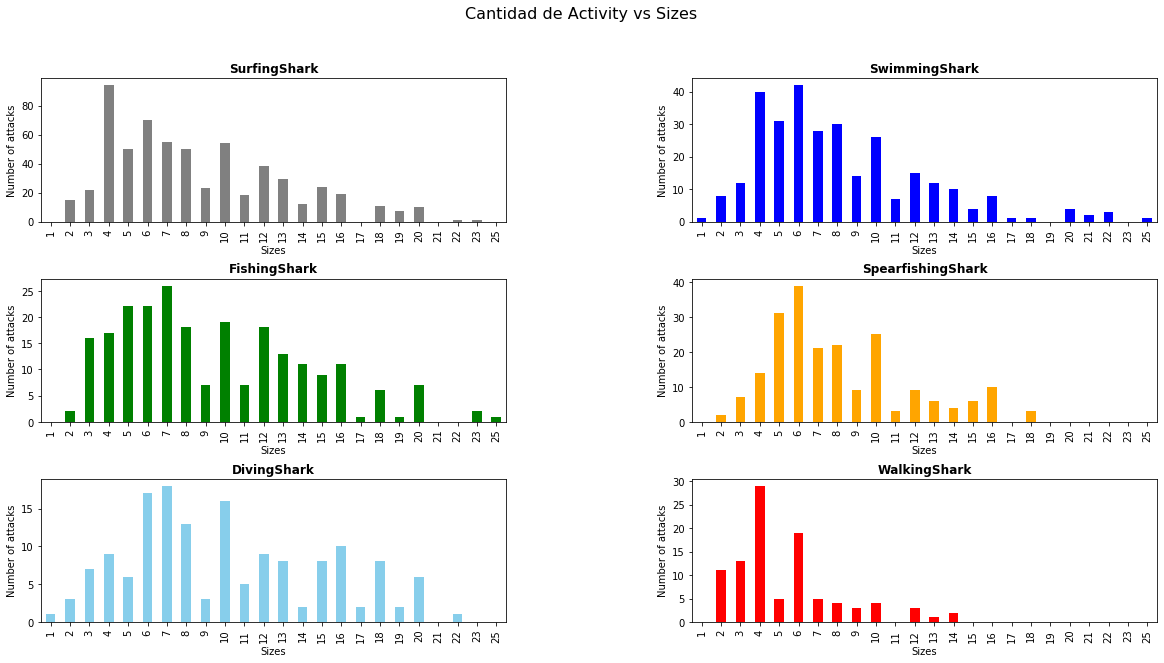

In [31]:
dp.draw_plot(plot_aux_activity, "Activity", 6)
#dp.draw_plot(plot_aux_type, "Type", 6)
#dp.draw_plot(plot_aux_injury, "Injury", 6)
#dp.draw_plot(plot_aux_activity, "Activity", 4)

display(dp.draw_frequency(plot_aux_species, "Species").head())
#display(dp.draw_frequency(plot_aux_type, "Type").head())
#display(dp.draw_frequency(plot_aux_injury, "Injury").head())
#display(dp.draw_frequency(plot_aux_activity, "Activity").head())

## Otras conclusiones

En una revisión rápida de los gráficos, se puede afirmar:

* De la columna `Species` que la mayoría de los ataques han sido provocados por especies pequeñas. El ataque de tiburones más grande suele ser del tiburón blanco. También hay cierta tendencia de ataques de tiburones tigre de tamaño algo mayor a la media.

* De la columna `Type`: Los ataques a barcos y los desastres son provocados por tiburones más grandes.

* De la columna `Injury`: Los ataques que hieren o que provocan pequeños daños son *right tail plots* (tiburones más pequeños). En cambio, los ataques más graves y muertes se asemejan más a una gráfica simétrica (tiburones más grandes).

* De la columna `Activity`: Todos los gráficos son *right tail plots* (tiburones más pequeños). Pero, por ejemplo, las actividades de surfing tienen una "cola" más fina y más inclinación hacia los tiburones pequeños, frente a la pesca, donde los ataques de tiburones más grandes son más frecuentes.

## To do's

* Al tener los datos limpios de varias columnas, podría relacionar varias de ellas: Especie vs Actividad, Fatalidad vs Especie, Injuries vs Especie, Injuries vs Actividad... E incluso relacionar varias de ellas en una sola tabla/fráfica.

* Las funciones de limpieza podrían optimizarse más, ya que estoy seguro que muchas veces cogen datos que no queremos.

* La función que limpia los tamaños y usa regex tiene un código algo sucio. Si me da tiempo lo limpio antes de entregarlo.

# Guardando nuestros datos

Finalmente, procedemos a guardar nuestra nueva df en .csv. Aprovechamos y también guardamos las tablas de frecuencia creadas.

In [32]:
wdf.to_csv("./cleaned_shark_attacks.csv")
dp.draw_frequency(plot_aux_species, "Species").to_csv("./freq-sizes-vs-species.csv")
dp.draw_frequency(plot_aux_type, "Type").to_csv("./freq-sizes-vs-type.csv")
dp.draw_frequency(plot_aux_injury, "Injury").to_csv("./freq-sizes-vs-injury.csv")
dp.draw_frequency(plot_aux_activity, "Activity").to_csv("./freq-sizes-vs-activity.csv")